In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#
data = pd.read_csv(r'C:\Users\dell\Desktop\ML_Project\data.csv')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data.rename(columns={'Recency (months)':'R','Frequency (times)':'F','Monetary (c.c. blood)':'M','Time (months)':'T','whether he/she donated blood in March 2007':'whether'}, inplace=True)
data.head()

,R,F,M,T,whether
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
#Analysis of the dataset
#1.The type of data
data_types=data.dtypes
print("The type of data\n",data_types)
#2.The missing values
#Is there a missing value in the column
data_missing_column=data.isnull().any()
print("Is there a missing value in the column:\n",data_missing_column)
# Find rows with missing values
nan_lines = data.isnull().any(1)
# Count how many rows have missing values
nan_lines_sum=nan_lines.sum()
print("Find rows with missing values:\n",nan_lines)
print("Count how many rows have missing values :",nan_lines_sum)
#Delete rows with null values in the data table



The type of data
 R          int64
F          int64
M          int64
T          int64
whether    int64
dtype: object
Is there a missing value in the column:
 R          False
F          False
M          False
T          False
whether    False
dtype: bool
Find rows with missing values:
 0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
728    False
729    False
730    False
731    False
732    False
733    False
734    False
735    False
736    False
737    False
738    False
739    False
740    False
741    Fals

In [5]:
#Calculate covariance, correlation coefficient using pandas
# Use DataFrame as the data structure. To facilitate calculation, we will transpose the matrix
dffm = pd.DataFrame(data, columns=['F', 'M'])
cov_F_M=dffm.F.cov(dffm.M)
print("F,M column covariance:",cov_F_M)
corr_F_M=dffm.F.corr(dffm.M)
print("Correlation coefficients of columns F and M:",corr_F_M)
dfft = pd.DataFrame(data,columns=['F', 'T'])
cov_F_T=dfft.F.cov(dfft.T)
print("F,T column covariance:",cov_F_T)
corr_F_T=dfft.F.corr(dfft.T)
print("Correlation coefficients of columns F and T:",corr_F_T)
dfmt = pd.DataFrame(data,columns=['M', 'T'])
cov_M_T=dfmt.M.cov(dfft.T)
print("M,T column covariance:",cov_M_T)
corr_M_T=dfmt.M.corr(dfft.T)
print("Correlation coefficients of columns M and T:",corr_M_T)


F,M column covariance: 8524.376919442475
Correlation coefficients of columns F and M: 0.9999999999999993
F,T column covariance: nan
Correlation coefficients of columns F and T: nan
M,T column covariance: nan
Correlation coefficients of columns M and T: nan


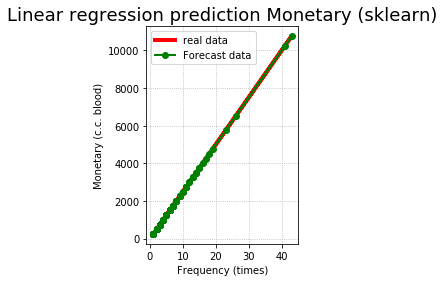

In [7]:
#Prediction 
#Due to the above correlation,we can predict
x = data[['F']]
y = data['M']
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


model = linear_model.LinearRegression()
model.fit(X_train,y_train)
pred_y=model.predict(X_test)
# Calculate training accuracy using 10% cross validation

plt.subplot(122)
plt.plot(X_test, y_test, 'r-', linewidth=4, label='real data')
plt.plot(X_test, pred_y, 'go-', linewidth=2, label='Forecast data')
plt.title('Linear regression prediction Monetary (sklearn)', fontsize=18)
plt.legend(loc='upper left')
plt.xlabel('Frequency (times)')
plt.ylabel('Monetary (c.c. blood)')
plt.grid(b=True, ls=':')
plt.show()

     whether
138        0
511        0
427        0
161        0
307        0
447        0
391        0
272        0
696        0
351        0
268        0
78         0
666        0
134        0
670        0
41         0
745        0
547        0
408        0
4          0
171        0
602        0
386        0
221        1
57         1
487        0
36         1
169        0
328        1
267        0
..       ...
456        0
185        0
399        1
485        0
553        0
535        1
671        0
250        0
85         0
655        0
9          1
639        1
183        0
597        0
82         0
64         1
172        0
414        0
563        0
119        1
166        0
299        0
196        1
178        1
367        0
587        0
402        0
681        0
303        0
182        0

[150 rows x 1 columns]
     whether  prediction
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
5          0        

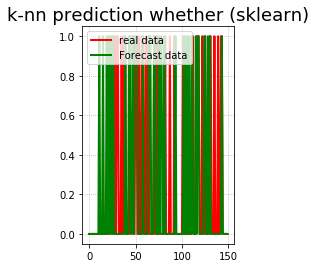

In [27]:
#K-Nearest Neighbours (K-NN) predict whether he/she donated blood in March 2007
X =data.ix[:,:4]
Y =data[['whether']]
X.head()
from sklearn import preprocessing
import sklearn.model_selection as cross_validation 
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled =min_max_scaler.fit_transform(X)
X_scaled[1:5]
#Dividing training and test sets
train_data,test_data, train_target, test_target = cross_validation.train_test_split(
X_scaled, Y, test_size=0.2, train_size=0.8,random_state=123) 
# Modeling

from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=3)  # Default Euclidean distance
model.fit(train_data,train_target.values.flatten())
test_est =model.predict(test_data)
print(test_target)
test_target['prediction']=test_est
test_target=test_target.reset_index(drop=True)
print(test_target)
plt.subplot(122)
plt.plot(test_target.index,test_target.whether , 'r-', linewidth=2, label='real data')
plt.plot(test_target.index,test_target.prediction, 'g-', linewidth=2, label='Forecast data')
plt.title('k-nn prediction whether (sklearn)', fontsize=18)
plt.legend(loc='upper left')

plt.grid(b=True, ls=':')
plt.show()

In [19]:
# Model evaluation

import sklearn.metrics as metrics

print(metrics.confusion_matrix(test_target,test_est, labels=[0, 1]))  # Confusion matrix

print(metrics.classification_report(test_target,test_est))

[[88 22]
 [24 16]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       110
           1       0.42      0.40      0.41        40

   micro avg       0.69      0.69      0.69       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.69      0.69      0.69       150

